In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the E-commerce dataset
df_ecom = pd.read_csv('Ecommerce_Data.csv')

In [14]:
# Load the holiday dates dataset
df_holidays = pd.read_csv('US_Holiday_Dates_(2004-2021).csv')

In [40]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81601 entries, 0 to 81600
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   81601 non-null  int64         
 1   InvoiceNo    81601 non-null  object        
 2   StockCode    81601 non-null  object        
 3   Description  81601 non-null  object        
 4   Quantity     81601 non-null  int64         
 5   UnitPrice    81601 non-null  float64       
 6   CustomerID   81601 non-null  float64       
 7   Country      81601 non-null  object        
 8   Date         81601 non-null  datetime64[ns]
 9   Hour         81601 non-null  int64         
 10  MonthYear    81601 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1)
memory usage: 7.5+ MB


In [22]:
# Check the completeness of the data
print("Completeness of Data:")
print(df_ecom.info())
print()

Completeness of Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81601 entries, 0 to 81600
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   81601 non-null  int64         
 1   InvoiceNo    81601 non-null  object        
 2   StockCode    81601 non-null  object        
 3   Description  81601 non-null  object        
 4   Quantity     81601 non-null  int64         
 5   UnitPrice    81601 non-null  float64       
 6   CustomerID   81601 non-null  float64       
 7   Country      81601 non-null  object        
 8   Date         81601 non-null  datetime64[ns]
 9   Hour         81601 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 6.8+ MB
None



In [23]:
# Check for missing values
print("Missing Values:")
print(df_ecom.isnull().sum())
print()

Missing Values:
Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Hour           0
dtype: int64



In [24]:
# Remove rows with missing CustomerID
df_ecom = df_ecom.dropna(subset=['CustomerID'])

In [25]:
# Convert the 'Date' column to datetime format
df_ecom['Date'] = pd.to_datetime(df_ecom['Date'])
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])

In [26]:
# Merge the datasets on relevant columns
merged_df = df_ecom.merge(df_holidays, left_on='Date', right_on='Date', how='left')

In [27]:
# Calculate the total expenditure for each holiday
holiday_expenditure = merged_df.groupby('Holiday')['UnitPrice'].sum().reset_index()
holiday_expenditure = holiday_expenditure.sort_values('UnitPrice', ascending=False)

In [28]:
print("Holiday Expenditure:")
print(holiday_expenditure)
print()

Holiday Expenditure:
                        Holiday  UnitPrice
1                  Columbus Day    2230.59
7              Thanksgiving Eve    2095.83
6              Thanksgiving Day    1366.89
9                  Veterans Day    1306.44
3                     Labor Day     893.15
2                    Juneteenth     748.64
4             Labor Day Weekend     733.88
10        Washington's Birthday     620.42
5   Martin Luther King, Jr. Day     546.18
0                   4th of July     466.73
8               Valentine’s Day     437.46



In [29]:
# Calculate the total expenditure for each holiday and customer segment
segment_expenditure = merged_df.groupby(['Holiday', 'CustomerID'])['UnitPrice'].sum().reset_index()

In [30]:
# Find the customer segment with the highest expenditure for each holiday
top_segment_per_holiday = segment_expenditure.groupby('Holiday').apply(lambda x: x.nlargest(1, 'UnitPrice')).reset_index(drop=True)

In [31]:
print("Top Segment per Holiday:")
print(top_segment_per_holiday)
print()

Top Segment per Holiday:
                        Holiday  CustomerID  UnitPrice
0                   4th of July     17841.0      60.00
1                  Columbus Day     14096.0     874.16
2                    Juneteenth     13097.0      99.56
3                     Labor Day     15238.0     136.75
4             Labor Day Weekend     13772.0      55.84
5   Martin Luther King, Jr. Day     14657.0      71.13
6              Thanksgiving Day     14277.0      99.16
7              Thanksgiving Eve     14096.0     317.09
8               Valentine’s Day     14527.0      70.01
9                  Veterans Day     14911.0      93.35
10        Washington's Birthday     17338.0      80.20



In [36]:
# Calculate the duration of each holiday season
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])
df_holidays['EndDate'] = df_holidays['Date'].shift(-1)
df_holidays['Duration'] = (df_holidays['EndDate'] - df_holidays['Date']).dt.days + 1

In [37]:
print("Holiday Season Duration:")
print(df_holidays[['Holiday', 'Duration']])
print()

Holiday Season Duration:
            Holiday  Duration
0       4th of July     366.0
1       4th of July     366.0
2       4th of July     366.0
3       4th of July     367.0
4       4th of July     366.0
..              ...       ...
337  Western Easter    4019.0
338  Western Easter   -1091.0
339  Western Easter    1828.0
340  Western Easter   -2918.0
341  Western Easter       NaN

[342 rows x 2 columns]



In [38]:
# Calculate the total revenue for each month-year
df_ecom['MonthYear'] = df_ecom['Date'].dt.to_period('M')
monthly_revenue = df_ecom.groupby('MonthYear')['UnitPrice'].sum()

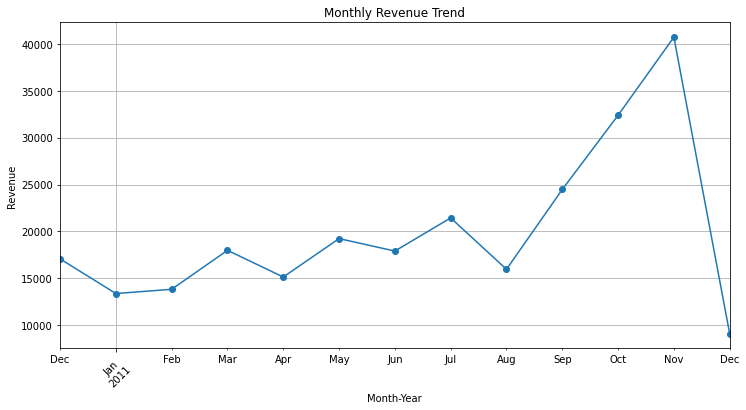

In [39]:
# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()